In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats


## Test of the Solarpotentials of the cantons Zürich, Bern and Jura

It should be compared whether the solar potential differs in the various cantons. the 0 hypothesis states that there is no difference. According to the alternative hypothesis, there is a difference between the solar potentials.

In [3]:
dfsolarpotenziale = pd.read_csv('../Quelldateien/solarpotential.csv')
dfsolarpotenziale

,Unnamed: 0,MunicipalityNumber,MunicipalityName,Canton,Country,Scenario1_RoofsOnly_PotentialSolarElectricity_GWh,Scenario2_RoofsOnly_PotentialSolarElectricity_GWh,Scenario2_RoofsOnly_PotentialSolarHeat_GWh,Scenario3_RoofsFacades_PotentialSolarElectricity_GWh,Scenario4_RoofsFacades_PotentialSolarElectricity_GWh,Scenario4_RoofsFacades_PotentialSolarHeat_GWh,Factsheet,Methodology,PLZ4,%_IN_GDE,KTKZ,GDENR
0,0,1,Aeugst am Albis,Zürich,CH,13.43,8.70,4.72,18.06,13.33,4.72,https://www.uvek-gis.admin.ch/BFE/storymaps/EC...,https://www.uvek-gis.admin.ch/BFE/redirect/sol...,8914.0,100.00,ZH,1.0
1,1,2,Affoltern am Albis,Zürich,CH,50.06,33.83,18.63,69.25,53.02,18.63,https://www.uvek-gis.admin.ch/BFE/storymaps/EC...,https://www.uvek-gis.admin.ch/BFE/redirect/sol...,8909.0,14.34,ZH,2.0
2,3,3,Bonstetten,Zürich,CH,19.66,11.48,8.79,26.72,18.54,8.79,https://www.uvek-gis.admin.ch/BFE/storymaps/EC...,https://www.uvek-gis.admin.ch/BFE/redirect/sol...,8906.0,100.00,ZH,3.0
3,4,4,Hausen am Albis,Zürich,CH,23.67,15.70,8.38,32.61,24.64,8.38,https://www.uvek-gis.admin.ch/BFE/storymaps/EC...,https://www.uvek-gis.admin.ch/BFE/redirect/sol...,6340.0,0.77,ZH,4.0
4,7,5,Hedingen,Zürich,CH,19.14,11.97,7.19,25.68,18.51,7.19,https://www.uvek-gis.admin.ch/BFE/storymaps/EC...,https://www.uvek-gis.admin.ch/BFE/redirect/sol...,8908.0,100.00,ZH,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2140,4768,6806,Vendlincourt,Jura,CH,8.83,6.04,2.35,11.61,8.82,2.35,https://www.uvek-gis.admin.ch/BFE/storymaps/EC...,https://www.uvek-gis.admin.ch/BFE/redirect/sol...,2943.0,100.00,JU,6806.0
2141,4769,6807,Basse-Allaine,Jura,CH,18.64,13.63,4.16,24.70,19.69,4.16,https://www.uvek-gis.admin.ch/BFE/storymaps/EC...,https://www.uvek-gis.admin.ch/BFE/redirect/sol...,2915.0,0.70,JU,6807.0
2142,4773,6808,Clos du Doubs,Jura,CH,21.19,15.39,5.47,27.37,21.57,5.47,https://www.uvek-gis.admin.ch/BFE/storymaps/EC...,https://www.uvek-gis.admin.ch/BFE/redirect/sol...,2882.0,46.03,JU,6808.0
2143,4780,6809,Haute-Ajoie,Jura,CH,26.39,20.84,5.01,33.19,27.64,5.01,https://www.uvek-gis.admin.ch/BFE/storymaps/EC...,https://www.uvek-gis.admin.ch/BFE/redirect/sol...,2906.0,49.43,JU,6809.0


In [4]:
dfsolarsubsets = dfsolarpotenziale[['Canton', 'Scenario1_RoofsOnly_PotentialSolarElectricity_GWh' ]]
options = ['Zürich', 'Bern', 'Jura']
dfsolarsubsets = dfsolarsubsets.loc[dfsolarsubsets['Canton'].isin(options)]

dfsolarsubsets

,Canton,Scenario1_RoofsOnly_PotentialSolarElectricity_GWh
0,Zürich,13.43
1,Zürich,50.06
2,Zürich,19.66
3,Zürich,23.67
4,Zürich,19.14
...,...,...
2140,Jura,8.83
2141,Jura,18.64
2142,Jura,21.19
2143,Jura,26.39


This graph describes the different distributions of the solar potentials. Due to the strong outliers, the box plots are greatly reduced

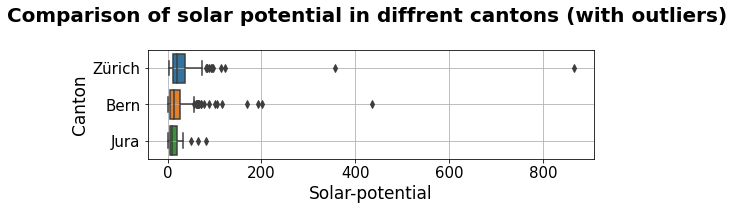

In [5]:
# Plot boxplot with groups
plt.figure(figsize=(8,2))
ax = sns.boxplot(x="Scenario1_RoofsOnly_PotentialSolarElectricity_GWh",
                 y="Canton",
                 data=dfsolarsubsets,
                 orient='h')
ax.tick_params(labelsize=15)
ax.set_xlabel("Solar-potential", fontsize=17)
ax.set_ylabel("Canton", fontsize=17)
plt.title("Comparison of solar potential in diffrent cantons (with outliers) \n", fontsize=20, fontweight="bold")
plt.grid()
plt.show()



In [6]:
dfsolarsubsets1 = dfsolarsubsets.loc[dfsolarsubsets['Scenario1_RoofsOnly_PotentialSolarElectricity_GWh'] < 100]
dfsolarsubsets1

,Canton,Scenario1_RoofsOnly_PotentialSolarElectricity_GWh
0,Zürich,13.43
1,Zürich,50.06
2,Zürich,19.66
3,Zürich,23.67
4,Zürich,19.14
...,...,...
2140,Jura,8.83
2141,Jura,18.64
2142,Jura,21.19
2143,Jura,26.39


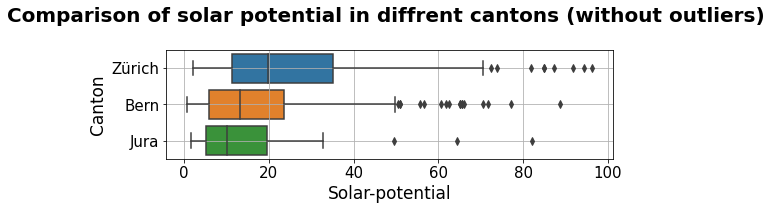

In [7]:
# Plot boxplot with groups
plt.figure(figsize=(8,2))
ax = sns.boxplot(x="Scenario1_RoofsOnly_PotentialSolarElectricity_GWh",
                 y="Canton",
                 data=dfsolarsubsets1,
                 orient='h')
ax.tick_params(labelsize=15)
ax.set_xlabel("Solar-potential", fontsize=17)
ax.set_ylabel("Canton", fontsize=17)
plt.title("Comparison of solar potential in diffrent cantons (without outliers) \n", fontsize=20, fontweight="bold")
plt.grid()
plt.show()

In [8]:
# Create subsets (groups)
Zürich = dfsolarsubsets.loc[dfsolarsubsets['Canton'] == 'Zürich']
Bern = dfsolarsubsets.loc[dfsolarsubsets['Canton'] == 'Bern']
Jura = dfsolarsubsets.loc[dfsolarsubsets['Canton'] == 'Jura']

# Create ANOVA
fvalue, pvalue = stats.f_oneway(Zürich['Scenario1_RoofsOnly_PotentialSolarElectricity_GWh'],
                                Bern['Scenario1_RoofsOnly_PotentialSolarElectricity_GWh'], 
                                Jura['Scenario1_RoofsOnly_PotentialSolarElectricity_GWh'])

# Print results
print('F-value:', fvalue.round(3), 'p-value', pvalue.round(4))

F-value: 5.476 p-value 0.0044


Since the p-value is below 5%, the 0 hypothesis can be rejected. There are therefore differences between the average solar potentials in the observed cantons.